In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

In [21]:
mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [4]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [5]:
PATH_TO_DATA = '/Users/ulyana/Documents/PhDThesisData/BNS_SkyLoc_Data/'

In [26]:
data_files = ['ET', 'ET+CE', 'ET+2CE']

In [27]:
lbs = ['SNR', 'redshift', 'ra', 'dec', 'psi', 'iota', 'luminosity_distance', 
        'mass_1', 'mass_2', 'geocent_time', 'phase', 'Omega', 'err_ra',
        'err_dec', 'err_psi', 'err_iota', 'err_luminosity_distance', 
        'err_mass_1', 'err_mass_2', 'err_geocent_time', 'err_phase']

line_st = ['solid', 'dashed', 'dashed', 'dashdot', 'dotted']
dashes = [() , (5, 0.5), (5, 5),(3,3,1,2) ,(1,1) ]
name=['40','200','400','800','1600']
legend_lbs=['40 Mpc','200 Mpc','400 Mpc','800 Mpc','1600 Mpc']

/var/folders/2f/xs1ws1zx6kz2y5t39btv9b6h0000gn/T/ipykernel_34456/4196670596.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend(title=data_file, loc='lower right', title_fontsize=21, frameon=False)
/var/folders/2f/xs1ws1zx6kz2y5t39btv9b6h0000gn/T/ipykernel_34456/4196670596.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend(title=data_file, loc='lower right', title_fontsize=21, frameon=False)
/Users/ulyana/anaconda3/envs/phd_thesis/lib/python3.9/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/var/folders/2f/xs1ws1zx6kz2y5t39btv9b6h0000gn/T/ipykernel_34456/4196670596.py:12: UserWarning: No artists with labels found to put in l

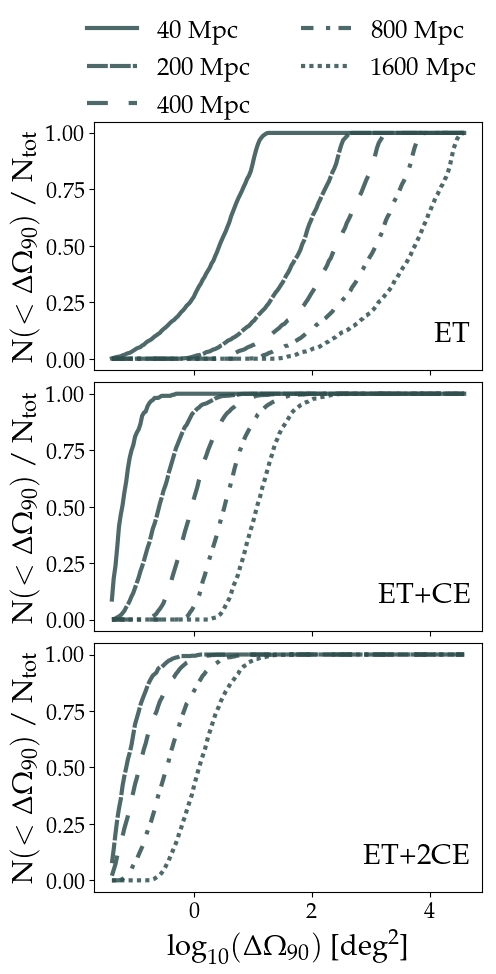

In [46]:
# plot cumulative histograms of the sky loc errors for each network configuration
fig, ax = plt.subplots(3, 1, figsize=(5, 10), sharex=True)

for i, data_file in enumerate(data_files):
    for j in range(len(name)):
        df = pd.read_csv(PATH_TO_DATA + data_file + '/%s.txt' %name[j], names=lbs, delimiter=' ')
        omega_arr=df['Omega'].to_numpy()*(180/np.pi)**2*2.3 # 90% CL
        bins=np.linspace(-1.4,np.log10(41253),200)
        hist=np.cumsum(np.histogram(np.log10(omega_arr), bins=bins, density=True)[0])
        ax[i].plot(bins[:-1],hist/hist[-1], linewidth=3, linestyle=line_st[j], dashes=dashes[j], 
                   color=my_color_darker, alpha=0.85, label='')
    ax[i].legend(title=data_file, loc='lower right', title_fontsize=21, frameon=False)
    ax[i].set_ylabel(r'N$(<\Delta\Omega_{90})$ / N$_{\rm tot}$', fontsize=21)
ax[-1].set_xlabel(r'$\log_{10}(\Delta\Omega_{90})$ [deg$^2$]', fontsize=21)
# add figure legend
fig.legend(legend_lbs, loc='upper center', bbox_to_anchor=(0.5, 1.005), ncol=2, fontsize=18, frameon=False)
plt.subplots_adjust( 
                    wspace=0.0, 
                    hspace=0.05)
plt.savefig('plots/bns_cumulative_sky_loc.pdf', bbox_inches='tight')
plt.show()